In [166]:
import matplotlib.pyplot as plt
from sage.plot.scatter_plot import ScatterPlot
from matplotlib.figure import Figure
import numpy as np

rho=1.225;G=9.81;
Cl_max=0.9;
q=lambda v:0.5*rho*v**2;
n_blades=2
I_max=1000*0.6;
T_night = 10;T_day=24-T_night;

eta_cell = 0.22
eta_tot = 0.92
eta_chg = 0.95
eta_prop =0.82

k_bat=160*3600

sigma_cell=0.5

#NOTH 5%
k_af = 0.44; x_2 = -0.25 ; x_1= 3.1

AR, S, b, c, m, WS= var('AR S b c m WS')
c=b/AR;S=b*c;WS=m*G/S;omega=0.95;
CL_lev,CD_lev,P_lev,m_tot=var('CL_lev CD_lev P_lev m_tot')
# CD_lev=0.025;
CL_lev=0.5
CD_lev = 0.012+ CL_lev**2/pi /AR /omega;
P_lev=CD_lev / CL_lev^(1.5) * sqrt(2*AR*G^3/rho)*m^(1.5)/b;
P_payload = 1;

P_elec=P_lev/eta_prop + P_payload;
A_cell=pi/(2* eta_cell* eta_tot * I_max)*(1+T_night/T_day /eta_chg/eta_chg) *P_elec

m_fixed=0.2;
m_payload=0.5;
m_af=k_af * AR^(x_2) * b^ (x_1) /G
m_cell=A_cell*sigma_cell;
m_bat = T_night*3600 /eta_chg/k_bat *P_elec;
m_prop = 0.25 /1000 * P_lev;
m_motor = 0.29 /1000 *P_elec;

m_tot=m_fixed +m_payload +m_af + m_cell+m_bat+m_prop+m_motor;
# m=m_tot
# m==m_tot.subs(AR==8,b==4)
# find_root(m ==m_tot.subs(AR==10,b==4),0.2,10)


In [172]:
(m_bat).subs(AR==8,b==4,m ==find_root(m ==m_tot.subs(AR==8,b==4),10,0.2)).n()
# find_root(m ==m_tot.subs(AR==8,b==2),0.2,10)

1.26686010527696

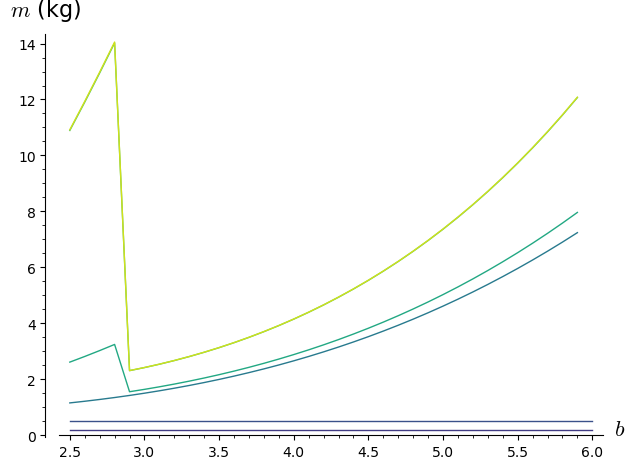

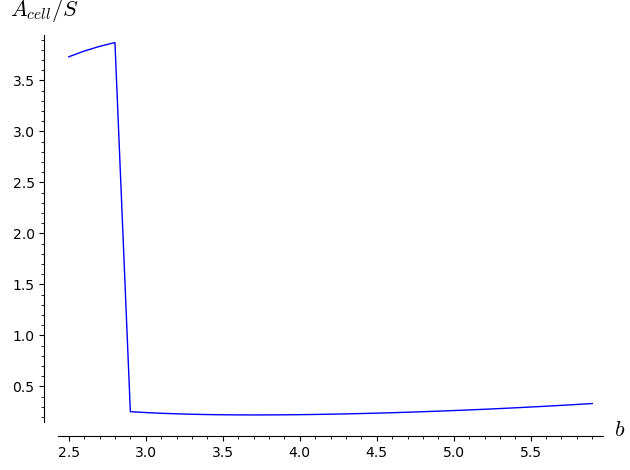

In [168]:
col_mp=[[0.275,0.02,0.376],[0.259,0.235,0.518],[0.231,0.318,0.541],
        [0.157,0.478,0.557],[0.133,0.659,0.514],[0.31,0.765,0.412],
        [0.816,0.882,0.106],[0.914,0.894,0.098]]
P_lev_list=[]
A_cell_S_list=[]
# for ib in range(3,18):
#     P_lev_list.append([ib,P_lev.subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),0.2,10)).n()])
# # print(P_lev_list)
# # ScatterPlot(list(np.array(P_lev_list)[:,0]),list(np.array(P_lev_list)[:,1]),{'facecolor':'white', 'marker':'s'}).show()
# # scatter_plot
# line(P_lev_list,color=[0.2,0.2,0.2])
m_af_list_cum=[]
m_cell_list_cum=[]
m_bat_list_cum=[]
m_prop_list_cum=[]
m_motor_list_cum=[]
for ib in srange(2.5,6,0.1):
    P_lev_list.append([ib,P_lev.subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),0.2,15)).n()])
    A_cell_S_list.append([ib,(A_cell/S).subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),0.2,15)).n()])
    m_af_list_cum.append([ib,(m_af+m_fixed+m_payload).subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),0.2,15)).n()])
    m_cell_list_cum.append([ib,(m_cell+m_af+m_fixed+m_payload).subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),15,0.2)).n()])
    m_bat_list_cum.append([ib,(m_bat+m_cell+m_af+m_fixed+m_payload).subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),15,0.2)).n()])
    m_prop_list_cum.append([ib,(m_prop+m_bat+m_cell+m_af+m_fixed+m_payload).subs(AR==8,b==ib,m ==find_root(m ==m_tot.subs(AR==8,b==ib),15,0.2)).n()])
    
f1=plot(m_fixed,2.5,6,color=col_mp[1],axes_labels=['$b$', '$m$ (kg)'])
f1.fontsize(10)
f2=plot(m_payload,2.5,6,color=col_mp[2])
f3=line(m_af_list_cum,color=col_mp[3])
f4=line(m_cell_list_cum,color=col_mp[4])
f5=line(m_bat_list_cum,color=col_mp[5])
f6=line(m_prop_list_cum,color=col_mp[6])
(f1+f2+f3+f4+f5+f6).show()

f7=line(A_cell_S_list,axes_labels=['$b$', '$A_{cell}/S$'])
# plt.ylim([0.2,1.5])
f7.show()

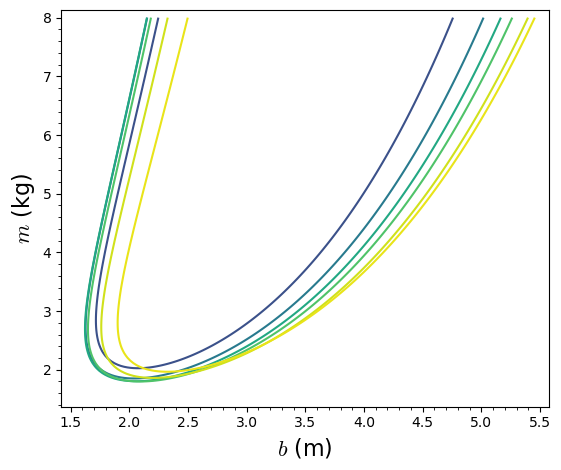

In [158]:

linsty=['-','--','-.',':']

Fig1 =Graphics();
AR_sub=[4,6,8,10,15,20];
ytext_list=[5.5,5,4.5,4,3.5,3,2.5,2];
col_mp=[[0.275,0.5,0.376],
        [0.231,0.318,0.541],
        [0.157,0.478,0.557],[0.133,0.659,0.514],[0.31,0.765,0.412],
        [0.816,0.882,0.106],[0.914,0.894,0.098],[0.976,0.902,0.12]]
for ite in range(len(AR_sub)):
    # col=3/ite
    col=0.0875*(ite+3)
    Fig1 += implicit_plot(
        m==m_tot.subs(AR==AR_sub[ite])
        # (A_cell/S).subs(AR==ite)
        ,(b,1.5,5.5),(m,1.5,8),
        # color=[col,col,col],
        color = col_mp[ite+1],
        # linestyle=linsty[ite %3]
        axes_labels=['$b$ (m)', '$m$ (kg)']
        );
    ytext= find_root(m==m_tot.subs(AR==AR_sub[ite],b==4),0.2,8)
    # Fig1 += text('$AR={}$'.format(AR_sub[ite]),(5.5,ytext_list[ite]),color=[col,col,col])
    



p=Fig1.show(aspect_ratio=0.5)
# p.save('out.png')

In [39]:
# Fig3=Graphics()
# Fig3+=implicit_plot(
#         m_af==m_af.subs(AR==AR_sub[ite])
#         # (A_cell/S).subs(AR==ite)
#         ,(b,0.4,6),(m_af,2.5,8),
#         # color=[col,col,col],
#         color = col_mp[ite+1],
#         # linestyle=linsty[ite %3]
#         axes_labels=['$b$ (m)', '$m$ (kg)']
#         );
# P_lev.arguments()

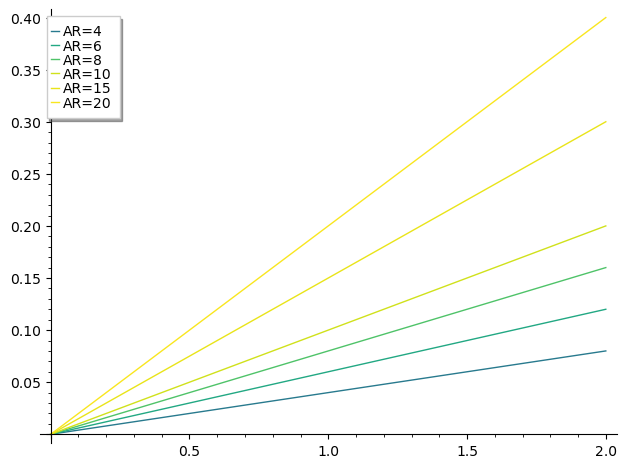

In [122]:
Fig2=Graphics();
for ite in range(len(AR_sub)):
    # col=3/ite
    col=0.0875*(ite+3)
    lgd='AR='+ str(AR_sub[ite])
    Fig2+= plot(AR_sub[ite]*b/100,(b,0,2),color = col_mp[ite+1],legend_label = lgd)
    # ytext= find_root(m==m_tot.subs(AR==AR_sub[ite],b==4),0.2,7)
    # Fig1 += text('$AR={}$'.format(AR_sub[ite]),(5.5,ytext_list[ite]),color=[col,col,col])
    


# implicit_plot((A_cell/S).subs(AR==8),(b,0.1,5),(m,0.1,5),color=[0.8,0.8,0.8])
p=Fig2.plot()
p.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

rho=1.225;G=9.81;
Cl_max=0.9;
q=lambda v:0.5*rho*v**2;
n_blades=2
I_max=900;
T_night = 10;T_day=24-T_night;

eta_cell = 0.22
eta_tot = 0.92
eta_chg = 0.95
eta_prop =0.82

k_bat=150*3600

sigma_cell=0.5

#NOTH 5%
k_af = 0.44; x_2 = -0.25 ; x_1= 3.1

AR, S, b, c, m, WS= var('AR S b c m WS')
c=b/AR;S=b*c;WS=m*G/S;
CL_lev,CD_lev,P_lev,m_tot=var('CL_lev CD_lev P_lev m_tot')
CD_lev=0.025;CL_lev=0.4
P_payload = 1;

P_elec=P_lev/eta_prop + P_payload;
A_cell=pi/(2* eta_cell* eta_tot * I_max)*(1+T_night/T_day /eta_chg/eta_chg) *P_elec

m_fixed=0.2;
m_payload=2;
m_af=k_af * AR^(x_2) * b^ (x_1) /G
m_cell=A_cell*sigma_cell;
print(m_cell)
m_bat = T_night /eta_chg/k_bat *P_elec;
m_prop = 0.25 /1000 * P_lev;
m_motor = 0.29 /1000 *P_elec;

m_tot=m_fixed +m_payload +m_af + m_cell+m_bat+m_prop+m_motor;
m=m_tot
P_lev=CD_lev / CL_lev^(1.5) * sqrt(2*AR*G^3/rho)*m^(1.5)/b;

print(P_lev)
# m==m_tot.subs(AR==8,b==4)
# find_root(m==m_tot.subs(AR==10,b==4),0.2,10)

Fig1 =Graphics();
# AR_sub=[4,8,10,15,20,30];
# # for ite in AR_sub:
# #     col=3/ite
# #     Fig1 += implicit_plot(
# #         m==m_tot.subs(AR==ite)
# #         # (A_cell/S).subs(AR==ite)
# #         ,(b,0.1,6),(m,2,8),color=[col,col,col],
# #         axes_labels=['$b$', '$A/S$']
# #         );
# #     ytext= find_root(m==m_tot.subs(AR==ite,b==4),0.2,7)
# #     Fig1 += text('$AR={}$'.format(ite),(5.5,ytext*2-4),color=[col,col,col])
# print(P_lev == (P_lev).subs(AR==8,b==4))
# find_root((P_lev).subs(AR==8,b==4)-P_lev,2,1000)

# plot((P_lev).subs(AR==8),(b,0.1,5),color=[0.8,0.8,0.8])



# for ite in AR_sub:
#     col=3/ite
#     Fig1 += implicit_plot(
#         m==m_tot.subs(AR==ite)
#         # (A_cell/S).subs(AR==ite)
#         ,(b,0.1,6),(m,2,8),color=[col,col,col],
#         axes_labels=['$b$', '$A/S$']
#         );
#     ytext= find_root(m==m_tot.subs(AR==ite,b==4),0.2,7)
#     Fig1 += text('$AR={}$'.format(ite),(5.5,ytext*2-4),color=[col,col,col])
    
# p=Fig1.plot()
# p.save('out.png')



In [ ]:
c, x, L, F, M = var('c x L F M')
c=piecewise([[(0,0.5),0.67],[(0.5,2),-0.37*2/3*x+0.67+2*0.37/3]])
F=0.67*0.5+(0.67+0.3)*1.5/2;
# print(F)
M1=piecewise([[(0,0.5),0.614999087500397-1.0625*(0.5-x)+
               0.67/2*(0.5^2-x^2)-0.67*(0.5-x)],
              [(0.5,2),-0.37*2/9*(2^3-x^3)+(0.67+2*0.37/3)/2*(2^2-x^2)+
               0.37/3*x*(2^2-x^2)-(0.67+0.37*2/3)*x*(2-x)]])
M2=-0.38/6*(2^3-x^3)+(0.78+2*0.38/2)/2*(2^2-x^2)+0.38/4*x*(2^2-x^2)-(0.78+0.38/2)*x*(2-x)
p1 = plot(M1,(x,0,2),color='grey',linestyle='-',legend_label='Dual Fuselage')
p2 = plot(M2,(x,0,2),color='black',linestyle='--',axes_labels=['L','M'],legend_label='Single Fuselage')
show(p1+p2)
# M1(0.500001)